In [70]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import collections

from sklearn.feature_extraction.text import CountVectorizer

import utils
from ctfidf import CTFIDFVectorizer


In [2]:
dataset = utils.load_data('train')
dataset

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
dataset = utils.transform_dataset(dataset)
dataset

,text,label
0,i did not feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,i am grabbing a minute to post i feel greedy w...,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


<AxesSubplot:>

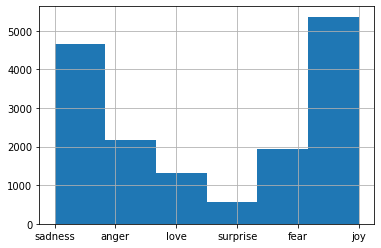

In [5]:
n_bins = dataset['label'].nunique()
dataset['label'].hist(bins=n_bins)

In [6]:
length_sr = dataset['text'].map(lambda x: len(x.split(' ')))
length_df = pd.DataFrame({'len': length_sr, 'label': dataset['label']})
length_df

,len,label
0,5,sadness
1,21,sadness
2,11,anger
3,18,love
4,4,anger
...,...,...
15995,24,sadness
15996,20,sadness
15997,6,joy
15998,14,anger


Text(0.5, 1.0, 'Boxplot of text length of samples by label')

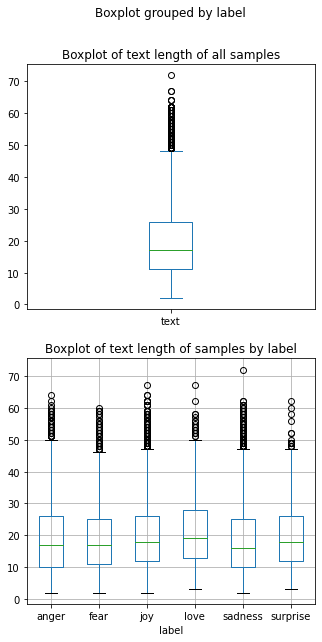

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

length_sr.plot.box(ax=axes[0])
axes[0].set_title('Boxplot of text length of all samples')

length_df.boxplot(column='len', by='label', ax=axes[1]) 
axes[1].set_title('Boxplot of text length of samples by label')

In [25]:
dataset[length_sr > 70]["text"].iloc[0]

'i feel in my bones like nobody cares if i am here nobody cares if i am gone here i am again saying i am feeling so lonely people either say it is ok to be alone or just go home it kills me and i do not know why it does not mean i do not try i try and try but people just treat me like i am a ghost'

In [24]:

all_words = ' '.join(dataset['text'].tolist())
all_unique_words = set(all_words.split(' '))
print('Number of unique words: {}'.format(len(all_unique_words)))

Number of unique words: 15331


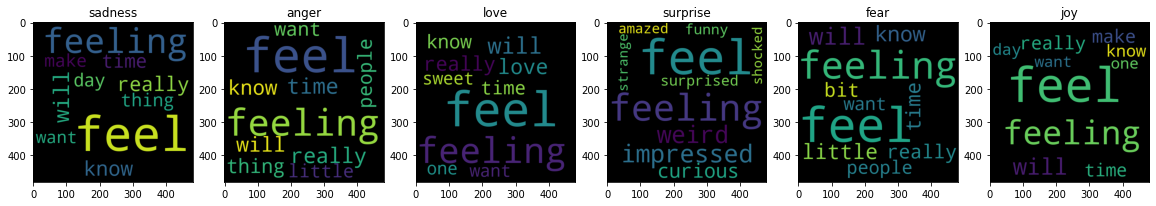

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

for i, label in enumerate(dataset['label'].unique()):
    label_words = ' '.join(dataset[dataset['label'] == label]['text'])
    word_cloud = wordcloud.WordCloud(width=480, height=480, max_words=10).generate(label_words)
    axes[i].imshow(word_cloud)
    axes[i].set_title(label)

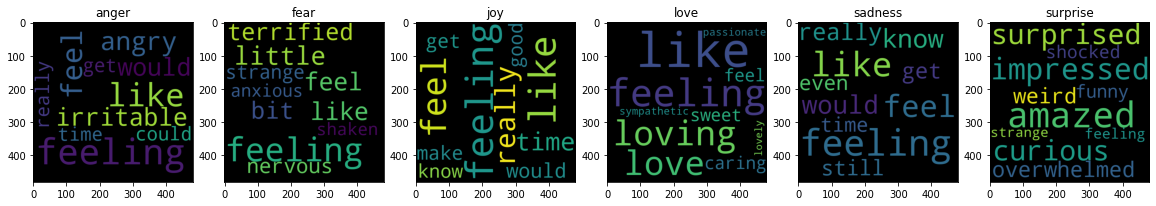

In [122]:
stopwords_path = os.path.join(os.path.abspath(''), 'stopwords.txt')
with open(stopwords_path, 'r') as f:
    stop_words = f.read().splitlines()

fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 5))

grouped_df = dataset.groupby(['label'], as_index=False).agg({'text': ' '.join})

count_vectorizer = CountVectorizer(stop_words=stop_words).fit(grouped_df['text'])
count = count_vectorizer.transform(grouped_df['text'])
words = count_vectorizer.get_feature_names_out()
classes_map = {i: label for i, label in enumerate(grouped_df['label'])}
ctfidf = CTFIDFVectorizer().fit_transform(count, len(dataset))

for i, label in classes_map.items():
    word_cloud = wordcloud.WordCloud(width=480, height=480, max_words=10)
    tmp_dict = dict(zip(words, ctfidf[i].toarray()[0]))
    img = word_cloud.generate_from_frequencies(tmp_dict)
    
    axes[i].imshow(img)
    axes[i].set_title(label)